In [434]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f', 'cm']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [435]:
t=linspace(0.3,1.5,13)
v=linspace(0.34,10,2000)

In [436]:
def p(v,t):
    return 8.0 * t / (3.0*v - 1.0) - 3.0 / v ** 2

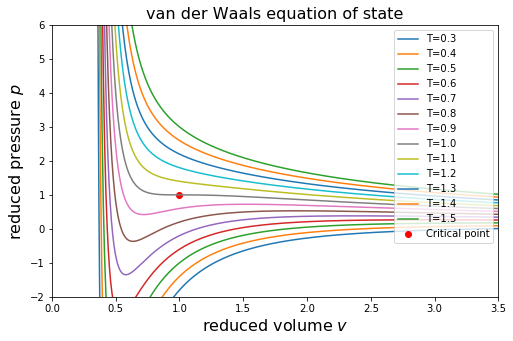

In [437]:
fig, ax= plt.subplots(1, 1, figsize=(8, 5))

#cm = plt.get_cmap('winter')
#ax.set_prop_cycle(cycler('color',[cm(1.*i/len(t)) for i in range(len(t))]))

for i in t:
    ax.plot(v,p(v,i),label='T='+str(i))
ax.set_xlim(0.0,3.5)
ax.set_title("van der Waals equation of state",size=16)
ax.set_xlabel("reduced volume $v$",size=16)
ax.set_ylabel("reduced pressure $p$",size=16)
ax.set_ylim(-2.0,6)
ax.scatter(1,1,label='Critical point', color='Red')
ax.legend(loc='upper right')
savefig('Eq_state_vdw.png')
pylab.show()

In [438]:
tspin=linspace(0.3,1,100)
V,T=meshgrid(v,tspin)
data=p(V,T)

In [439]:
vspin=array([])
pspin=array([])
vspinr=array([])
pspinr=array([])
for k in range(len(tspin[tspin<1])):
    dif=data[k][1:]-data[k][:-1]
    l=where(dif>0)[0][0]-1
    m=where(dif[l+1:]<0)[0][0]+l
    vspin=append(vspin,v[l])
    pspin=append(pspin,data[k][l])
    vspinr=append(vspinr,v[m])
    pspinr=append(pspinr,data[k][m])
vspin=concatenate((vspin,array([1]),vspinr[::-1]))
pspin=concatenate((pspin,array([1]),pspinr[::-1]))

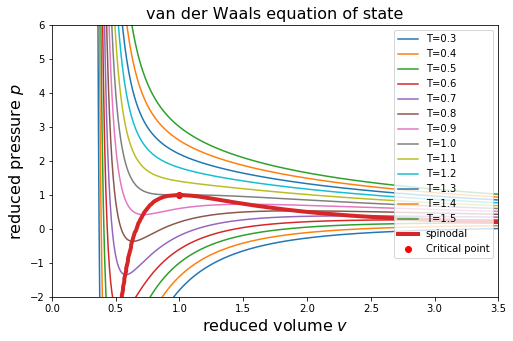

In [440]:
fig, ax= plt.subplots(1, 1, figsize=(8, 5))

for i in t:
    ax.plot(v,p(v,i),label='T='+str(i))
ax.set_xlim(0.0,3.5)
ax.set_title("van der Waals equation of state",size=16)
ax.set_xlabel("reduced volume $v$",size=16)
ax.set_ylabel("reduced pressure $p$",size=16)
ax.set_ylim(-2.0,6)
ax.scatter(1,1,label='Critical point', color='Red')
ax.plot(vspin,pspin,label='spinodal', linewidth=4)
ax.legend(loc='upper right')

savefig('Eq_state_vdw_spinodal.png')
pylab.show()

# D
$$
\int_{v_1}^{v_x}dv (p(v)-p_{coex})=-\int_{v_x}^{v_2}dv (p(v)-p_{coex})
$$
By passing to the other side this equation is equivalent to.
$$
\int_{v_1}^{v_2}dv(p(v)-p_{coex})
$$
And we should also check the condition $p(v_x)=p_{coex}$

In [441]:
v1=0.4896
v2=5.643
pcoex=0.28246
vx=1.281
v=linspace(0.34,10,2000)
x=linspace(0,1,100)

In [442]:
def p(v):
    return 8.0 * 0.75 / (3.0*v - 1.0) - 3.0 / v ** 2

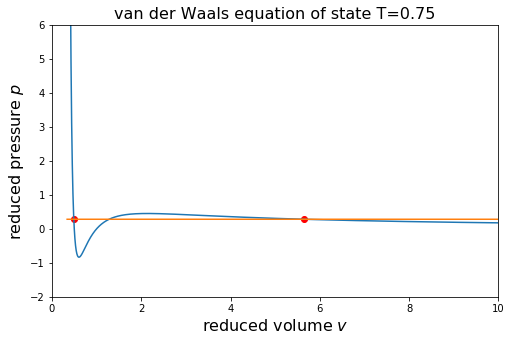

In [443]:
fig, ax= plt.subplots(1, 1, figsize=(8, 5))
ax.plot(v,p(v))
ax.plot(v,pcoex*ones(len(v)))
ax.set_xlim(0.0,10)
ax.set_ylim(-2.0,6)
ax.set_title("van der Waals equation of state T=0.75",size=16)
ax.set_xlabel("reduced volume $v$",size=16)
ax.set_ylabel("reduced pressure $p$",size=16)
ax.scatter([v1,v2],pcoex*ones(2),color='red')
savefig('van der Waals T=0.75.png')
pylab.show()

In [444]:
import scipy.integrate as integrate

In [445]:
def g(v):
    return p(v)-pcoex
integrate.quad(g,v1,v2)

(-7.4577490067478935e-06, 8.60476276354545e-13)

Hence the integral is 0 up to the 6th decimal place

In [446]:
def f(v):
    y,err=integrate.quad(p,1,v)
    return -y

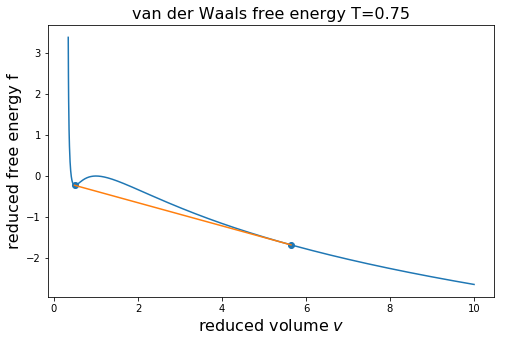

In [447]:
fig, ax= plt.subplots(1, 1, figsize=(8, 5))
ax.plot(v,list(map(f,v)))
ax.plot(v2*x+(1-x)*v1,f(v2)*x+(1-x)*f(v1))
ax.scatter([v1,v2],[f(v1),f(v2)])
ax.set_title("van der Waals free energy T=0.75",size=16)
ax.set_xlabel("reduced volume $v$",size=16)
ax.set_ylabel("reduced free energy f",size=16)
savefig('van der Waals free energy T=0.75.png')
pylab.show()

# III Beyond van der Waals

In [448]:
pcoex=0.50449
v1=0.55336
v2=3.1276
v=linspace(0.34,4,20000)

In [449]:
def p(v):
    return 8.0 * 0.85 / (3.0*v - 1.0) - 3.0 / v ** 2

In [450]:
def f(v):
    y,err=integrate.quad(p,1,v)
    return -y

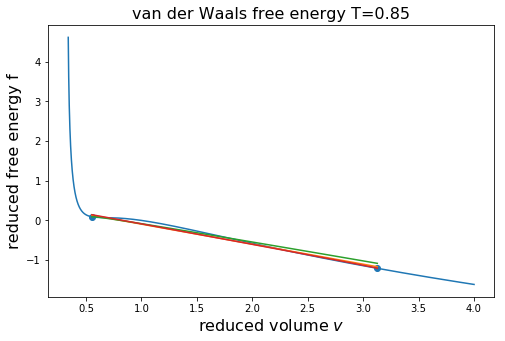

In [451]:
fig, ax= plt.subplots(1, 1, figsize=(8, 5))
ax.plot(v,list(map(f,v)))
ax.plot(v2*x+(1-x)*v1,f(v2)*x+(1-x)*f(v1)+0.04,label='strip')
ax.plot(v2*x+(1-x)*v1,f(v2)*x+(1-x)*f(v1)+0.04*sqrt(pi*v2*x),label='$f_{2-1}$')
ax.plot(v2*x+(1-x)*v1,f(v2)*x+(1-x)*f(v1)+0.04*sqrt(pi*v1*(1-x)),label='$f_{1-2}$')
ax.scatter([v1,v2],[f(v1),f(v2)])
ax.set_title("van der Waals free energy T=0.85",size=16)
ax.set_xlabel("reduced volume $v$",size=16)
ax.set_ylabel("reduced free energy f",size=16)
savefig('van der Waals free energy finite system.png')
pylab.show()

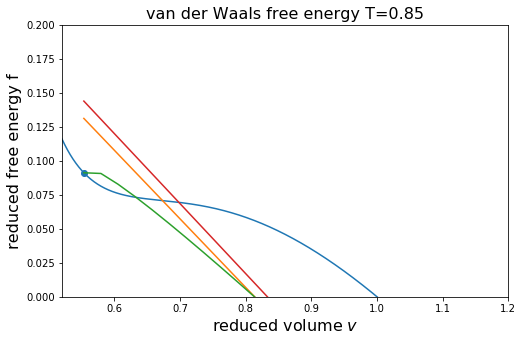

In [452]:
fig, ax= plt.subplots(1, 1, figsize=(8, 5))
ax.plot(v,list(map(f,v)))
ax.plot(v2*x+(1-x)*v1,f(v2)*x+(1-x)*f(v1)+0.04,label='strip')
ax.plot(v2*x+(1-x)*v1,f(v2)*x+(1-x)*f(v1)+0.04*sqrt(pi*v2*x),label='$f_{2-1}$')
ax.plot(v2*x+(1-x)*v1,f(v2)*x+(1-x)*f(v1)+0.04*sqrt(pi*v1*(1-x)),label='$f_{1-2}$')
ax.scatter([v1,v2],[f(v1),f(v2)])
ax.set_xlim(0.52,1.2)
ax.set_ylim(0,0.2)
ax.set_title("van der Waals free energy T=0.85",size=16)
ax.set_xlabel("reduced volume $v$",size=16)
ax.set_ylabel("reduced free energy f",size=16)
savefig('van der Waals free energy T=0.75 near v1.png')
pylab.show()

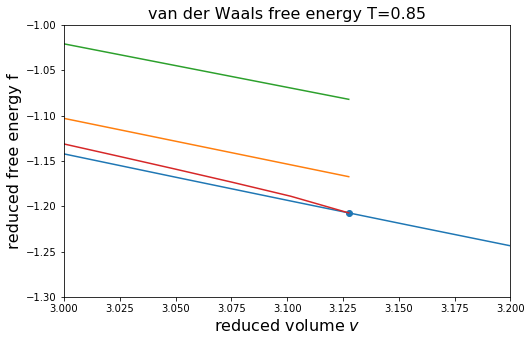

In [453]:
fig, ax= plt.subplots(1, 1, figsize=(8, 5))
ax.plot(v,list(map(f,v)))
ax.plot(v2*x+(1-x)*v1,f(v2)*x+(1-x)*f(v1)+0.04,label='strip')
ax.plot(v2*x+(1-x)*v1,f(v2)*x+(1-x)*f(v1)+0.04*sqrt(pi*v2*x),label='$f_{2-1}$')
ax.plot(v2*x+(1-x)*v1,f(v2)*x+(1-x)*f(v1)+0.04*sqrt(pi*v1*(1-x)),label='$f_{1-2}$')
ax.scatter([v1,v2],[f(v1),f(v2)])
ax.set_xlim(3,3.2)
ax.set_ylim(-1.3,-1)
ax.set_title("van der Waals free energy T=0.85",size=16)
ax.set_xlabel("reduced volume $v$",size=16)
ax.set_ylabel("reduced free energy f",size=16)
savefig('van der Waals free energy T=0.75 near v2.png')
pylab.show()

In [423]:
f(v2)

-1.2074141731910057